In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import KFold


In [117]:
'''Reading the data from the link provided'''

data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

## Data Prep

In [118]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [119]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,11914.0,2010.384338,7.579740,1990.0,2007.0,2015.0,2016.00,2017.0
Engine HP,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.00,1001.0
Engine Cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.00,16.0
Number of Doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.00,4.0
highway MPG,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
city mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
Popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
MSRP,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [121]:
data = data[['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type','Vehicle Style','highway MPG','city mpg','MSRP']]

'''Transforming the column names to lower case and replacing the space with _'''

data.columns = data.columns.str.lower().str.replace(' ','_')

'''Filling the null values with 0'''

data.fillna(0,inplace=True)

data.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [124]:
data['above_average'] = (data.msrp >= data.msrp.mean()).astype('int')

### Converting above_average to categorical variable

# data.above_average = data.above_average.astype('category')

## Dropping the price column

data.drop('msrp',axis=1,inplace=True)

In [125]:
data.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


In [126]:
### Splitting the data into train, val and test sets with 60%, 20% and 20% respectively

df_full_train,df_test = train_test_split(data,test_size=0.2,random_state=1)

df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)

In [127]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [128]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [129]:
numeric = ['year','engine_hp','engine_cylinders','highway_mpg','city_mpg']
categorical = ['make','model','transmission_type','vehicle_style']

In [130]:
'''Running logistic regression using sklearn with individual numeric features and calcualting the AUC score using only train data'''

df_train[numeric]

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
5727,2016,280.0,6.0,28,27
5814,2014,300.0,6.0,30,18
8450,2016,259.0,4.0,27,19
2396,2015,280.0,6.0,25,17
5494,2016,283.0,6.0,25,17
...,...,...,...,...,...
5864,2015,148.0,4.0,33,24
7924,2016,325.0,6.0,24,17
4719,2017,130.0,4.0,37,32
63,1991,162.0,5.0,20,16


In [131]:
def train_logit(df_train,y_train):
    model = LogisticRegression(solver='liblinear',random_state=1)
    model.fit(df_train,y_train)
    return model

def predict(model,df):
    y_pred = model.predict_proba(df)[:,1]
    print(df.columns)
    print(roc_auc_score(y_train,y_pred))

def roc_plot(model,df,y):
    y_pred = model.predict_proba(df)[:,1]
    fpr,tpr,thresholds = roc_curve(y_train,y_pred)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

Index(['year'], dtype='object')
0.31244850719531714


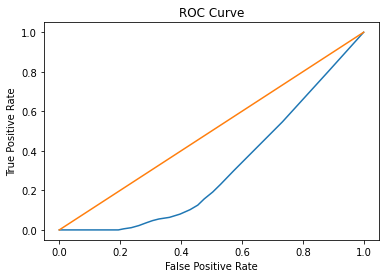

Index(['engine_hp'], dtype='object')
0.9171031265539011


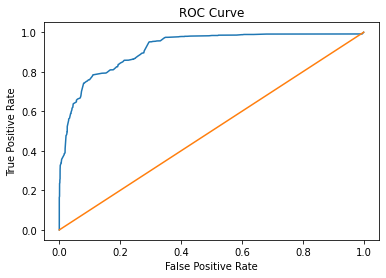

Index(['engine_cylinders'], dtype='object')
0.766116490165669


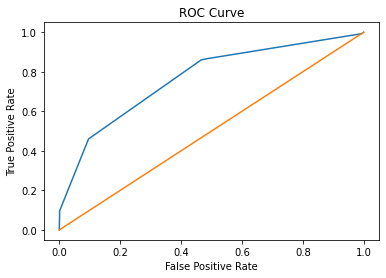

Index(['highway_mpg'], dtype='object')
0.6330587871772013


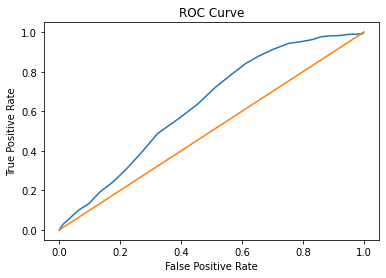

Index(['city_mpg'], dtype='object')
0.6734244643245233


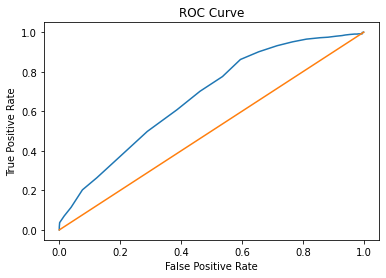

In [132]:
for col in numeric:
    df = df_train[[col]]
    model = train_logit(df,y_train)
    predict(model,df)
    roc_plot(model,df,y_train)

## Answer 1: engine_hp has highest AUC

## Training a Logit Model

In [155]:
def train_full_logit(df,y):
    dicts = df.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000,random_state=1)
    model.fit(X_train,y)
    return dv,model

def predict_full(model,dv,df):
    dicts = df.to_dict(orient='records')
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    # price_decision = y_pred[(y_pred >= 0.5)]
    return y_pred

def roc_plot(y,y_pred):
    print('ROC: ',round(roc_auc_score(y, y_pred),4))
    fpr,tpr,thresholds = roc_curve(y,y_pred)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(['Logistic Regression','Random Guess'])
    plt.show()

ROC:  0.9798


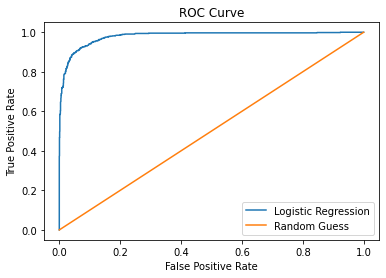

In [156]:
dv,model = train_full_logit(df_train,y_train)

y_pred = predict_full(model,dv,df_val)

roc_plot(y_val,y_pred)


## ROC on the validation set is 0.9798

In [192]:
'''Computing Precision and Recall and F1 score for the model wtih thresholds 0 to 1 with 0.01 increments and storing the values in a dataframe along with the threshold values'''

def precision_recall(y,y_pred,threshold):
    y_pred = (y_pred >= threshold).astype('int')
    tp = ((y == 1) & (y_pred == 1)).sum()
    fp = ((y == 0) & (y_pred == 1)).sum()
    fn = ((y == 1) & (y_pred == 0)).sum()
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*(precision*recall)/(precision+recall)
    return precision,recall,f1_score

thresholds = np.linspace(0,1,101)

scores = []
for t in thresholds:
    precision,recall,f1_score = precision_recall(y_val,y_pred,t)
    scores.append((t,precision,recall,f1_score))

scores_df = pd.DataFrame(scores,columns=['threshold','precision','recall','f1_score'])

/var/folders/hq/dmjxvds52ldbnl7q29lhhjxc0000gn/T/ipykernel_5968/2223395674.py:8: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp/(tp+fp)


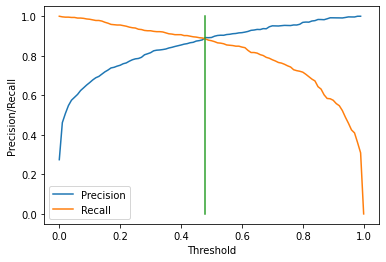

In [193]:
'''Plotting the precision and recall values for different thresholds'''

plt.plot(scores_df.threshold,scores_df.precision,label='Precision')
plt.plot(scores_df.threshold,scores_df.recall,label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.plot([0.48,0.48],[1,0])
plt.legend()
plt.show()

## Curves intercept at 0.48 threshold

In [198]:
scores_df[scores_df.f1_score == scores_df.f1_score.max()]

,threshold,precision,recall,f1_score
48,0.48,0.892142,0.885321,0.888718


In [204]:
scores_df[scores_df.threshold == 0.52]

,threshold,precision,recall,f1_score
52,0.52,0.902711,0.865443,0.883685


## According to my model the max F1 score is at 0.48 threshold but out of the options max threshold will be at 0.52 (negligible difference between 0.52 and 0.48)

In [206]:
df_full_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
2711,Mercedes-Benz,CLK-Class,2007,382.0,8.0,AUTOMATIC,Coupe,22,15,1
333,Nissan,370Z,2016,332.0,6.0,MANUAL,Coupe,26,18,0
9377,GMC,Sierra 1500,2017,285.0,6.0,AUTOMATIC,Extended Cab Pickup,24,18,0
939,Porsche,911,2016,350.0,6.0,MANUAL,Convertible,26,19,1
5675,Volkswagen,GTI,2013,200.0,4.0,MANUAL,4dr Hatchback,31,21,0
...,...,...,...,...,...,...,...,...,...,...
7813,Audi,Q5,2016,272.0,6.0,AUTOMATIC,4dr SUV,26,18,1
10955,Toyota,Tundra,2015,381.0,8.0,AUTOMATIC,Crew Cab Pickup,17,13,1
905,Saab,900,1997,150.0,4.0,MANUAL,4dr Hatchback,26,18,0
5192,Pontiac,G6,2009,164.0,4.0,AUTOMATIC,Coupe,33,22,0


In [225]:
'''Using 5 KFold cross validation to evaluate the model, AUC score and standard deviation of the scores across the folds'''


# def train_full_logit(df,y):
#     dicts = df.to_dict(orient='records')
#     dv = DictVectorizer(sparse=False)
#     X_train = dv.fit_transform(dicts)
#     model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000,random_state=1)
#     model.fit(X_train,y)
#     return dv,model

# def predict_full(model,dv,df):
#     dicts = df.to_dict(orient='records')
#     X = dv.transform(dicts)
#     y_pred = model.predict_proba(X)[:,1]
#     # price_decision = y_pred[(y_pred >= 0.5)]
#     return y_pred


def train_kfold_logit(df,y,k):
    dicts = df.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X = dv.fit_transform(dicts)
    scores = []
    kfold = KFold(n_splits=k,shuffle=True,random_state=1)
    for train_idx,val_idx in kfold.split(X):

        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        del df_train['above_average']
        del df_val['above_average']

        dv,model = train_full_logit(df_train,y_train)
        y_pred = predict_full(model,dv,df_val)

        auc = roc_auc_score(y_val,y_pred)
        scores.append(auc)
    return scores

scores = train_kfold_logit(df_full_train,y_train,5)

print('AUC: ',round(np.mean(scores),3))
print('STD: ',round(np.std(scores),3))

AUC:  0.98
STD:  0.003


### STD Across folds is 0.003

In [236]:
'''Using 5 KFold cross validation to evaluate the model, AUC score and standard deviation of the scores across the folds, find the best regularization parameter from 0.01,0.1,0.5,10'''

def train_full_logit(df,y,C):
    dicts = df.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000,random_state=1)
    model.fit(X_train,y)
    return dv,model


def train_kfold_logit_reg(df,y,k):
    dicts = df.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X = dv.fit_transform(dicts)
    for C in [0.01,0.1,0.5,10]:
        scores = []
        kfold = KFold(n_splits=k,shuffle=True,random_state=1)
        for train_idx,val_idx in kfold.split(X):

            df_train = df_full_train.iloc[train_idx]
            df_val = df_full_train.iloc[val_idx]
            y_train = df_train.above_average.values
            y_val = df_val.above_average.values

            del df_train['above_average']
            del df_val['above_average']

            dv,model = train_full_logit(df_train,y_train,C)
            y_pred = predict_full(model,dv,df_val)

            auc = roc_auc_score(y_val,y_pred)
            scores.append(auc)
            
        print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))
    return scores

scores = train_kfold_logit_reg(df_full_train,y_train,5)

C=0.01 0.952 +- 0.003
C=0.1 0.972 +- 0.002
C=0.5 0.978 +- 0.002
C=10 0.982 +- 0.003


## C = 10 has the best AUC score

##### FIN #####